In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# Collecting Data

In [63]:
path1="C:/Users/dell/Downloads/Measurement_info.csv"
df_meas_info = pd.read_csv(path1)
df_meas_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [64]:
path2="C:/Users/dell/Downloads/Measurement_item_info.csv"
df_meas_item = pd.read_csv(path2)
df_meas_item.head()

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [65]:
path3="C:/Users/dell/Downloads/Measurement_station_info.csv"
df_meas_station = pd.read_csv(path3)
df_meas_station.head()

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [66]:
path4="C:/Users/dell/Downloads/Measurement_summary.csv"
df_summary = pd.read_csv(path4)
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


# See how many missing value we have:

In [67]:
# get the number of missing data points per column
print(df_summary.isnull().sum())

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


In [68]:
print(df_meas_info.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64


In [69]:
print(df_meas_item.isnull().sum())

Item code              0
Item name              0
Unit of measurement    0
Good(Blue)             0
Normal(Green)          0
Bad(Yellow)            0
Very bad(Red)          0
dtype: int64


In [70]:
print(df_meas_station.isnull().sum())

Station code              0
Station name(district)    0
Address                   0
Latitude                  0
Longitude                 0
dtype: int64


That seems like a no problem about missing data. It helpful to process to clen data.

# Data Pre-Processing & Visualization

In [71]:
date_time = df_summary['Measurement date'].str.split(" ", n=1, expand=True)
date_time.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [72]:
df_summary['date'] = date_time[0]
df_summary['time']= date_time[1]
df_summary = df_summary.drop(['Measurement date'], axis=1)
df_summary.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


In [73]:
df_seoul = df_summary.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


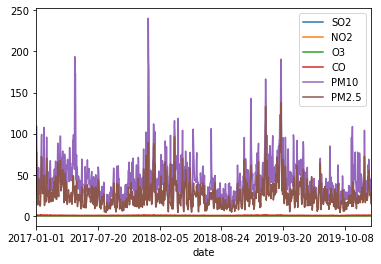

In [74]:
df_seoul.plot(x='date')

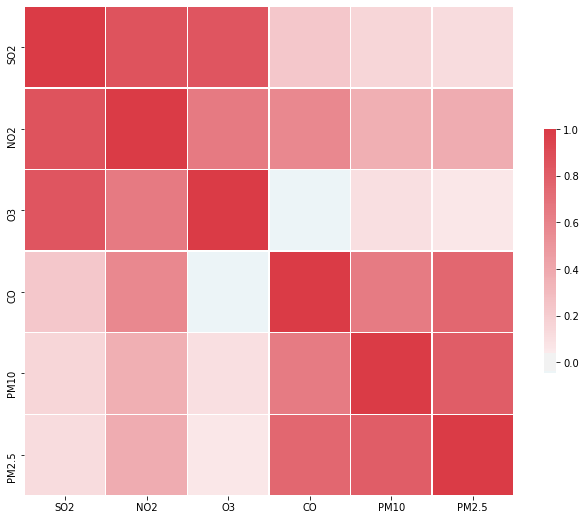

In [75]:
corr = df_seoul.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [76]:
df_seoul['PM10_class'] = -1
for (idx, row) in df_seoul.iterrows():
    pm10 = row[5]
    _class = -1
    if pm10 < 0:
        continue
    elif pm10 < 30:
        _class = 0
    elif pm10 < 80:
        _class = 1
    elif pm10 < 150:
        _class = 2
    else:
        _class = 3
    df_seoul.loc[idx, 'PM10_class'] = _class
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1


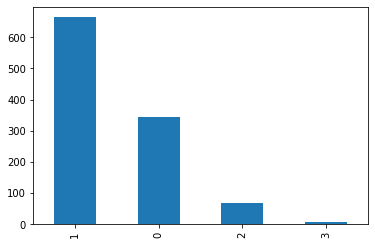

In [77]:
df_seoul['PM10_class'].value_counts().plot(kind="bar")

In [103]:
df_seoul["PM2.5_class"]=-1
for (idx,row) in df_seoul.iterrows():
    pm=row[6]
    _class=-1
    if pm< 0:
        continue
    elif pm<10:
        _class=0
    elif pm<25:
        _class=1
    elif pm<80:
        _class=2
    else:
        _class=3
    df_seoul.loc[idx,'PM2.5_class']=_class

In [104]:
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class,PM2.5_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1,2
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2,2
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1,2
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1,2
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1,1


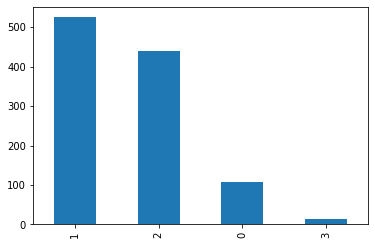

In [105]:
df_seoul['PM2.5_class'].value_counts().plot(kind="bar")

In [116]:
df_seoul['SO2_class']=-1
for (idx,row) in df_seoul.iterrows():
    so=row[1]
    _class=-1
    if so<0:
        continue
    elif so<0.02:
        _class=0
    elif so<0.05:
        _class=1
    elif so<0.15:
        _class=2
    else:
        _class=3
    df_seoul.loc[idx,'SO2_class']=_class

In [119]:
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class,PM2.5_class,SO2_class,NO2_class,CO_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1,2,0,1,0
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2,2,0,1,0
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1,2,0,1,0
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1,2,0,1,0
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1,1,0,1,0


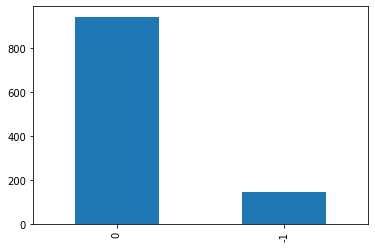

In [108]:
df_seoul['SO2_class'].value_counts().plot(kind="bar")

In [110]:
df_seoul['NO2_class']=-1
for (idx,row) in df_seoul.iterrows():
    no=row[2]
    _class=-1
    if no<0:
        continue
    elif no<0.03:
        _class=0
    elif no<0.06:
        _class=1
    elif no<0.20:
        _class=2
    else:
        _class=3
    df_seoul.loc[idx,'NO2_class']=_class

In [111]:
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class,PM2.5_class,SO2_class,NO2_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1,2,0,1
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2,2,0,1
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1,2,0,1
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1,2,0,1
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1,1,0,1


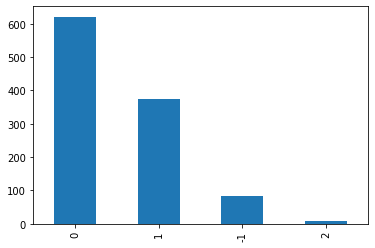

In [112]:
df_seoul['NO2_class'].value_counts().plot(kind="bar")

In [113]:
df_seoul['CO_class']=-1
for (idx,row) in df_seoul.iterrows():
    co=row[3]
    _class=-1
    if co<0:
        continue
    elif co<2:
        _class=0
    elif co<9:
        _class=1
    elif co<15:
        _class=2
    else:
        _class=3
    df_seoul.loc[idx,'CO_class']=_class

In [114]:
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class,PM2.5_class,SO2_class,NO2_class,CO_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1,2,0,1,0
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2,2,0,1,0
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1,2,0,1,0
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1,2,0,1,0
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1,1,0,1,0


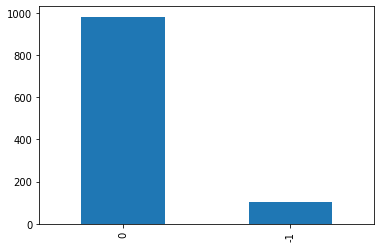

In [115]:
df_seoul['CO_class'].value_counts().plot(kind="bar")

In [120]:
df_seoul['O3_class']=-1
for (idx,row) in df_seoul.iterrows():
    o=row[4]
    _class=-1
    if o<0:
        continue
    elif o<0.03:
        _class=0
    elif o<0.09:
        _class=1
    elif o<0.15:
        _class=2
    else:
        _class=3
    df_seoul.loc[idx,'O3_class']=_class

In [121]:
df_seoul.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM10_class,PM2.5_class,SO2_class,NO2_class,CO_class,O3_class
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333,1,2,0,1,0,3
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333,2,2,0,1,0,3
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333,1,2,0,1,0,3
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333,1,2,0,1,0,3
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333,1,1,0,1,0,3


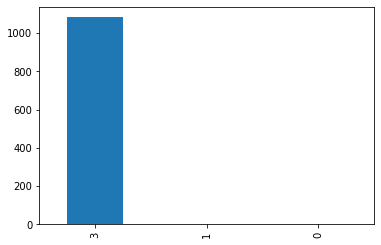

In [122]:
df_seoul['O3_class'].value_counts().plot(kind="bar")

# Data Splitting & Model Selection

In [79]:
y= pd.DataFrame(df_seoul.iloc[:,3:4])
y.head()

,O3
0,0.002478
1,0.013127
2,0.008223
3,0.006918
4,0.009725


In [82]:
x= pd.DataFrame(df_seoul.iloc[:,1:3])
x.head()

,SO2,NO2
0,0.003627,0.044765
1,0.002707,0.035960
2,0.000602,0.037017
3,0.004122,0.048813
4,0.003122,0.033892


In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [84]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(759, 2)
(326, 2)
(759, 1)
(326, 1)


In [85]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
v = pd.DataFrame(lr.coef_ , index=['Coefficients']).transpose()
v

,Coefficients
0,1.492347
1,-0.438132


In [88]:
w = pd.DataFrame(x.columns, columns=['Attributes'])
w

,Attributes
0,SO2
1,NO2


In [92]:
df_coeff= pd.concat([w,v], axis=1)
df_coeff

,Attributes,Coefficients
0,SO2,1.492347
1,NO2,-0.438132


In [101]:
y_pred = lr.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head()

,Predicted
0,0.028021
1,0.021073
2,0.028291
3,0.022825
4,0.024446


In [102]:
y_test.head()

,O3
873,0.045597
80,0.025343
535,0.037515
329,0.010945
244,0.026538


In [100]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009711303632781035
Mean Squared Error: 0.00021858610968756242
Root Mean Squared Error: 0.014784657915811322


In [123]:
metrics.r2_score(y_test,y_pred)

0.5755759461710528